In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.express as px

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,fbeta_score

In [2]:
import imblearn

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn. neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble,svm
from sklearn.ensemble import RandomForestClassifier

## PART I : Data Preparation

In [3]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("/benishmodel.csv")
cdata = pd.read_csv("/completedata.csv")

In [5]:
data

,Company ID,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,Manipulator,C-MANIPULATOR
0,1,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,Yes,1
1,2,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,Yes,1
2,3,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,Yes,1
3,4,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,Yes,1
4,5,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
215,216,1.002026,0.998118,-0.917605,1.088962,1.030527,1.076770,-0.001079,1.080009,No,0
216,217,0.909365,1.170298,1.971874,1.279013,0.971605,0.985939,-0.035854,1.025102,No,0
217,218,0.937403,0.973292,1.131131,1.083577,1.050011,0.959512,-0.095279,0.976332,No,0
218,219,1.044944,1.021424,4.437887,0.870790,1.026489,1.060493,-0.157146,0.916070,No,0


###  The above data is Sample for Model Development data

In [6]:
cdata

,Company ID,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,Manipulater,C-MANIPULATOR
0,1,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,Yes,1
1,2,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,Yes,1
2,3,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,Yes,1
3,4,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,Yes,1
4,5,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
1234,1235,0.893794,1.009273,1.121404,0.775386,1.035547,1.467146,-0.139215,0.947127,No,0
1235,1236,1.610841,1.000000,0.672489,3.320315,0.743969,0.968648,-0.028570,2.052802,No,0
1236,1237,0.711823,0.938368,1.045118,1.057345,1.274005,0.634451,-0.174759,0.782268,No,0
1237,1238,0.870641,1.035855,1.447722,1.202783,1.101233,1.010935,-0.061474,0.906750,No,0


### the above data is Complete data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company ID     220 non-null    int64  
 1   DSRI           220 non-null    float64
 2   GMI            220 non-null    float64
 3   AQI            220 non-null    float64
 4   SGI            220 non-null    float64
 5   DEPI           220 non-null    float64
 6   SGAI           220 non-null    float64
 7   ACCR           220 non-null    float64
 8   LEVI           220 non-null    float64
 9   Manipulator    220 non-null    object 
 10  C-MANIPULATOR  220 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 19.0+ KB


## PART II : Exploratory Data Analysis

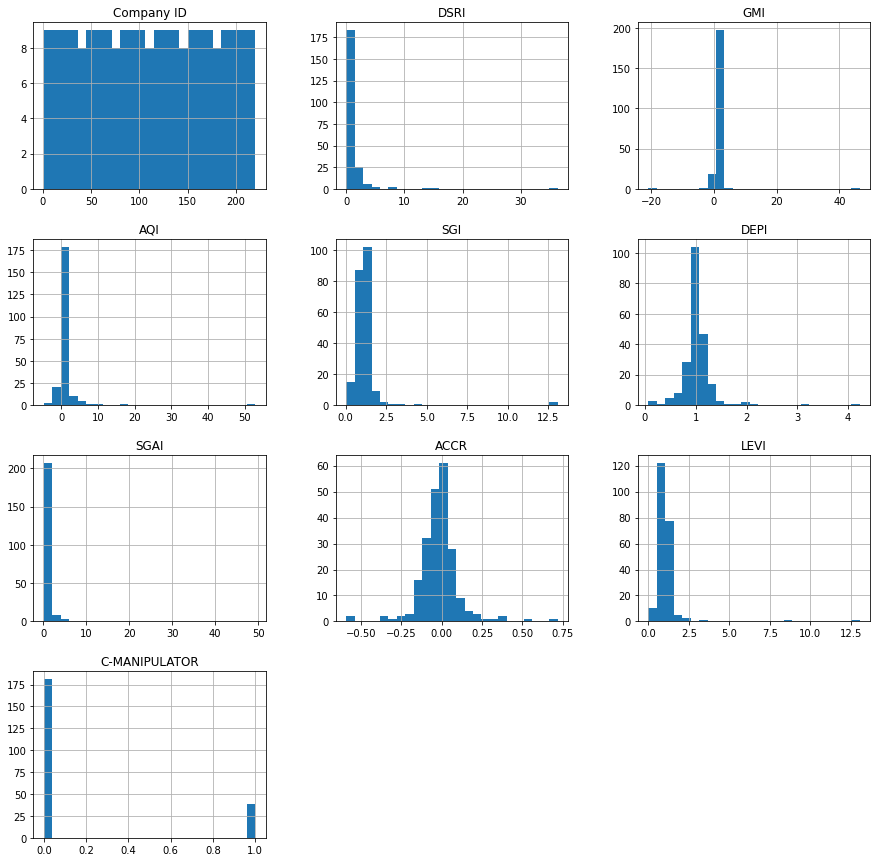

In [8]:
data.hist(bins=25, figsize=(15,15))
plt.show()

## PART III : Data Cleaning

In [9]:
data.isna().any()

Company ID       False
DSRI             False
GMI              False
AQI              False
SGI              False
DEPI             False
SGAI             False
ACCR             False
LEVI             False
Manipulator      False
C-MANIPULATOR    False
dtype: bool

There are no null value. The data is clean

In [10]:
data['Manipulator'].value_counts()

No     181
Yes     39
Name: Manipulator, dtype: int64

In [11]:
cdata['Manipulater'].value_counts()

No     1200
Yes      39
Name: Manipulater, dtype: int64

([<matplotlib.patches.Wedge at 0x7f645830bb90>,
 [Text(-0.9337765969331362, 0.5814303630014274, 'Not Manipulator'),
  Text(0.9337765697144155, -0.5814304067146641, 'Manipulator')],
 [Text(-0.5093326892362561, 0.3171438343644149, '82.27%'),
  Text(0.5093326743896811, -0.3171438582079985, '17.73%')])

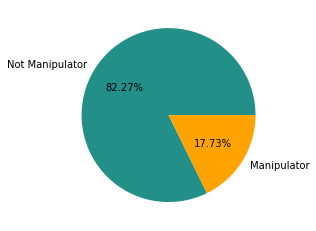

In [12]:
plt.pie(x = data.groupby(['Manipulator']).Manipulator.count(),
        labels = ["Not Manipulator", "Manipulator"], autopct='%1.2f%%',
        colors=['#229088','#ffa300'])

The data seems to be highly imbalanced. 

#### Droping CompanyID and Manipulator as it won't be needed

In [13]:
data=data.drop(['Company ID','Manipulator'], axis=1)

In [14]:
data.head()

,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI,C-MANIPULATOR
0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082,1
1,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732,1
2,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305,1
3,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975,1
4,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047,1


## PART IV : Spliting data set into training and test dataset

Building model using Sample for Model Development data

In [15]:
X=data.drop(['C-MANIPULATOR'], axis=1)
Y=data['C-MANIPULATOR']

In [16]:
X

,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI
0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082
1,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732
2,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305
3,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975
4,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047
...,...,...,...,...,...,...,...,...
215,1.002026,0.998118,-0.917605,1.088962,1.030527,1.076770,-0.001079,1.080009
216,0.909365,1.170298,1.971874,1.279013,0.971605,0.985939,-0.035854,1.025102
217,0.937403,0.973292,1.131131,1.083577,1.050011,0.959512,-0.095279,0.976332
218,1.044944,1.021424,4.437887,0.870790,1.026489,1.060493,-0.157146,0.916070


In [18]:
from imblearn.over_sampling import RandomOverSampler

ros= RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X,Y)

In [47]:
X = x_ros
Y = y_ros


# we will now train model as now after applying OverSampling the data is balanced.

In [20]:
X

,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI
0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082
1,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732
2,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305
3,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975
4,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047
...,...,...,...,...,...,...,...,...
357,0.905532,1.360915,0.783995,1.793324,1.278244,0.505260,0.054642,1.543137
358,2.165712,0.986394,0.906729,1.197609,1.046819,1.363694,0.017250,1.203173
359,2.165712,0.986394,0.906729,1.197609,1.046819,1.363694,0.017250,1.203173
360,1.000000,-1.416667,16.426650,0.416667,0.068823,2.400000,-0.004071,1.000000


In [23]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=42)

In [24]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions Y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions Y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (253, 8)
Number transactions Y_train dataset:  (253,)
Number transactions X_test dataset:  (109, 8)
Number transactions Y_test dataset:  (109,)


## PART V : Training Model 

#### 1. Linear Regression

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
Y_predict = lin_reg.predict(X_test)
score = lin_reg.score(X_test, Y_test)
linaccuracy = round(score*100,2)
print('accuracy_score percent :', linaccuracy)
msr = np.mean((Y_predict-Y_test)**2)
print("Mean Squared error on Test set : ",msr)

accuracy_score percent : -184.7
Mean Squared error on Test set :  0.7117012773019973


#### 2. Logistic Regression

In [26]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, Y_train)
y_pred = logistic_model.predict(X_test)
score = logistic_model.score(X_test, Y_test)
logaccuracy  = round(score*100,2)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
f2 = fbeta_score(Y_test, y_pred, beta=2.0)
print('Logistic Regression- ')
print('accuracy  : ', logaccuracy)
print('Precision : ',precision)
print('Recall    : ', recall)
print('F1 Score  : ',f1)
print('F2 Score  : ',f2)

Logistic Regression- 
accuracy  :  81.65
Precision :  0.8431372549019608
Recall    :  0.7818181818181819
F1 Score  :  0.8113207547169811
F2 Score  :  0.7933579335793359


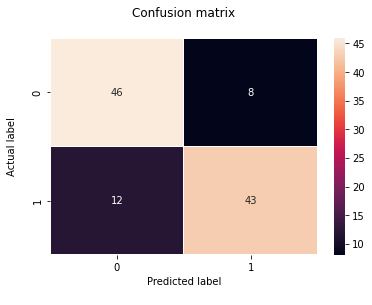

In [27]:
import seaborn as sns
cm = confusion_matrix(Y_test,y_pred)
f,ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm,annot = True, linewidths = 0.5, fmt=".0f", ax=ax)
plt.title('Confusion matrix\n')
plt.xlabel('Predicted label\n')
plt.ylabel('Actual label\n')
plt.show()

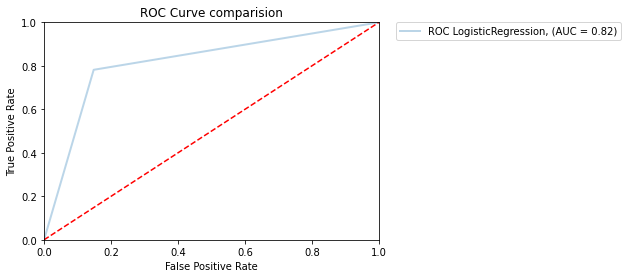

In [28]:
#Receiver operating characterstic curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
predicted = logistic_model.fit(X_train, Y_train).predict(X_test)
fp, tp, th = roc_curve(Y_test, predicted)
plt.plot(fp,tp,lw = 2, alpha = 0.3, label='ROC %s, (AUC = %0.2f)' %(logistic_model.__class__.__name__, auc(fp,tp)))
plt.title('ROC Curve comparision')
plt.legend(bbox_to_anchor =(1.05,1), loc = 2, borderaxespad =0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# PART VI: Improving model accuracy

AdaBoost Classifier- 
accuracy  :  90.83
Precision :  0.8813559322033898
Recall    :  0.9454545454545454
F1 Score  :  0.9122807017543859
F2 Score  :  0.9318996415770607


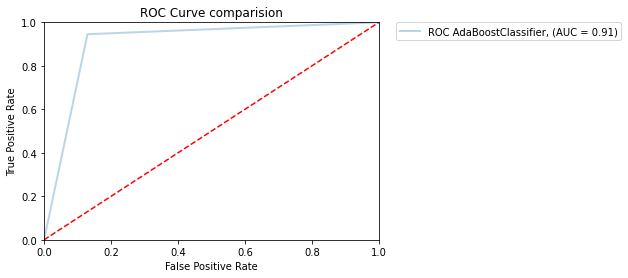

In [29]:
ada = ensemble.AdaBoostClassifier()
pred_ada = ada.fit(X_train,Y_train).predict(X_test)
score = ada.score(X_test, Y_test)
adaaccuracy = round(accuracy_score(Y_test,pred_ada),4)*100
precision = precision_score(Y_test, pred_ada)
recall = recall_score(Y_test, pred_ada)
f1 = f1_score(Y_test, pred_ada)
f2 = fbeta_score(Y_test, pred_ada, beta=2.0)
print('AdaBoost Classifier- ')
print('accuracy  : ', adaaccuracy)
print('Precision : ',precision)
print('Recall    : ', recall)
print('F1 Score  : ',f1)
print('F2 Score  : ',f2)
fp, tp, th = roc_curve(Y_test, pred_ada)
plt.plot(fp,tp,lw = 2, alpha = 0.3, 
         label='ROC %s, (AUC = %0.2f)' %(ada.__class__.__name__, auc(fp,tp)))
plt.title('ROC Curve comparision')
plt.legend(bbox_to_anchor =(1.05,1), loc = 2, borderaxespad =0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
from sklearn.ensemble import VotingClassifier
m1 = LogisticRegression()
m2 = DecisionTreeClassifier(random_state=123)
m3 = RandomForestClassifier()
votingclf = VotingClassifier(estimators=[('lr', m1), ('dt', m2),('rf',m3)], voting='hard')

In [31]:
model_list = [
    ensemble.AdaBoostClassifier(n_estimators= 80),
    ensemble.BaggingClassifier(n_estimators =72, random_state=123),
    ensemble.GradientBoostingClassifier(n_estimators=70, random_state = 123),
    ensemble.RandomForestClassifier(),
    svm.SVC(),
    votingclf,
    KNeighborsClassifier(n_neighbors=3),
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(random_state=0)
]

In [32]:
cols =[]
model_table =pd.DataFrame(columns = cols)

count = 0
for i in model_list:
    pred_model = i.fit(X_train,Y_train).predict(X_test)
    fp,tp,th = roc_curve(Y_test, pred_model)
    cm = confusion_matrix(Y_test,pred_model)
    model_table.loc[count,'Algorithm'] = i.__class__.__name__
    model_table.loc[count,'Train Accuracy'] = round(i.score(X_train, Y_train),2)*100
    model_table.loc[count,'Test Accuracy'] = round(i.score(X_test, Y_test),2)*100
    model_table.loc[count,'Sensitivity'] = round(tp[1],2)
    model_table.loc[count,'Specificity'] = 1-round(fp[1],2)
    model_table.loc[count,'Precision'] = round(precision_score(Y_test, pred_model),2)
    model_table.loc[count,'F1 Score'] = round(f1_score(Y_test, pred_model),2)
    model_table.loc[count,'F2 Score'] = round(fbeta_score(Y_test, pred_model, beta=2.0),2)
    count+=1
model_table.sort_values(by = ['Test Accuracy', 'Precision', 'Sensitivity'], ascending = False, inplace = True)
model_table

,Algorithm,Train Accuracy,Test Accuracy,Sensitivity,Specificity,Precision,F1 Score,F2 Score
5,VotingClassifier,100.0,92.0,0.95,0.89,0.90,0.92,0.94
0,AdaBoostClassifier,100.0,91.0,0.95,0.87,0.88,0.91,0.93
3,RandomForestClassifier,100.0,91.0,0.95,0.87,0.88,0.91,0.93
1,BaggingClassifier,100.0,91.0,1.00,0.81,0.85,0.92,0.96
2,GradientBoostingClassifier,100.0,89.0,0.95,0.83,0.85,0.90,0.93
8,DecisionTreeClassifier,100.0,83.0,0.85,0.80,0.81,0.83,0.85
6,KNeighborsClassifier,97.0,83.0,0.93,0.74,0.78,0.85,0.89
7,LogisticRegression,81.0,82.0,0.78,0.85,0.84,0.81,0.79
4,SVC,73.0,65.0,0.35,0.96,0.90,0.50,0.39


# Part VII : 

<h3> Here <b>Sample for Model Development</b> is used for training the model and <b>Complete Data</b> is used for testing</h3>

In [40]:
X_train = x_ros 
X_train


,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI
0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082
1,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732
2,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305
3,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975
4,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047
...,...,...,...,...,...,...,...,...
357,0.905532,1.360915,0.783995,1.793324,1.278244,0.505260,0.054642,1.543137
358,2.165712,0.986394,0.906729,1.197609,1.046819,1.363694,0.017250,1.203173
359,2.165712,0.986394,0.906729,1.197609,1.046819,1.363694,0.017250,1.203173
360,1.000000,-1.416667,16.426650,0.416667,0.068823,2.400000,-0.004071,1.000000


In [42]:
Y_train = y_ros 
Y_train

0      1
1      1
2      1
3      1
4      1
      ..
357    1
358    1
359    1
360    1
361    1
Name: C-MANIPULATOR, Length: 362, dtype: int64

In [43]:
X_test = cdata.drop(['Company ID','Manipulater','C-MANIPULATOR'], axis=1)
X_test

,DSRI,GMI,AQI,SGI,DEPI,SGAI,ACCR,LEVI
0,1.624742,1.128927,7.185053,0.366211,1.381519,1.624145,-0.166809,1.161082
1,1.000000,1.606492,1.004988,13.081433,0.400000,5.198207,0.060475,0.986732
2,1.000000,1.015607,1.241389,1.475018,1.169353,0.647671,0.036732,1.264305
3,1.486239,1.000000,0.465535,0.672840,2.000000,0.092890,0.273434,0.680975
4,1.000000,1.369038,0.637112,0.861346,1.454676,1.741460,0.123048,0.939047
...,...,...,...,...,...,...,...,...
1234,0.893794,1.009273,1.121404,0.775386,1.035547,1.467146,-0.139215,0.947127
1235,1.610841,1.000000,0.672489,3.320315,0.743969,0.968648,-0.028570,2.052802
1236,0.711823,0.938368,1.045118,1.057345,1.274005,0.634451,-0.174759,0.782268
1237,0.870641,1.035855,1.447722,1.202783,1.101233,1.010935,-0.061474,0.906750


In [44]:
Y_test = cdata['C-MANIPULATOR']
Y_test

0       1
1       1
2       1
3       1
4       1
       ..
1234    0
1235    0
1236    0
1237    0
1238    0
Name: C-MANIPULATOR, Length: 1239, dtype: int64

In [45]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions Y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions Y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (362, 8)
Number transactions Y_train dataset:  (362,)
Number transactions X_test dataset:  (1239, 8)
Number transactions Y_test dataset:  (1239,)


In [46]:
cols =[]
model_table =pd.DataFrame(columns = cols)

count = 0
for i in model_list:
    pred_model = i.fit(X_train,Y_train).predict(X_test)
    fp,tp,th = roc_curve(Y_test, pred_model)
    cm = confusion_matrix(Y_test,pred_model)
    model_table.loc[count,'Algorithm'] = i.__class__.__name__
    model_table.loc[count,'Train Accuracy'] = round(i.score(X_train, Y_train),2)*100
    model_table.loc[count,'Test Accuracy'] = round(i.score(X_test, Y_test),2)*100
    model_table.loc[count,'Sensitivity'] = round(tp[1],2)
    model_table.loc[count,'Specificity'] = 1-round(fp[1],2)
    model_table.loc[count,'Precision'] = round(precision_score(Y_test, pred_model),2)
    model_table.loc[count,'F1 Score'] = round(f1_score(Y_test, pred_model),2)
    model_table.loc[count,'F2 Score'] = round(fbeta_score(Y_test, pred_model, beta=2.0),2)
    count+=1
model_table.sort_values(by = ['Test Accuracy', 'Precision', 'Sensitivity'], ascending = False, inplace = True)
model_table

,Algorithm,Train Accuracy,Test Accuracy,Sensitivity,Specificity,Precision,F1 Score,F2 Score
3,RandomForestClassifier,100.0,97.0,1.00,0.96,0.48,0.65,0.82
5,VotingClassifier,100.0,97.0,1.00,0.96,0.48,0.64,0.82
2,GradientBoostingClassifier,100.0,96.0,1.00,0.95,0.41,0.59,0.78
1,BaggingClassifier,100.0,95.0,1.00,0.95,0.41,0.58,0.78
0,AdaBoostClassifier,100.0,95.0,1.00,0.95,0.40,0.57,0.77
4,SVC,69.0,95.0,0.36,0.97,0.28,0.31,0.34
8,DecisionTreeClassifier,100.0,92.0,1.00,0.92,0.28,0.44,0.66
6,KNeighborsClassifier,97.0,91.0,1.00,0.91,0.26,0.41,0.63
7,LogisticRegression,85.0,89.0,0.79,0.90,0.20,0.32,0.50


# PART VIII : Conclusion

<li>Since the data was highly imbalanced, it is prefferd to use ensemble methods. And after training various model we can see that RandomForest Classifier and Voting classifier are most suitable for Manipulator prediction.
<li>Initially we used Logistic Regression which gave an accuracy of 81.65%. But then after applying variour ensembling techniques we got 92% accuracy for VotingClassifier	and AdaBoostClassifier.
<li>Later, on testing these classifers on CompleteData we got 97% accuracy for Random Forest and Voting Classifier. And GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier and SVC are having an accuracy of 96% and 95% which can also be taken into consideration.